# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import contextily as cx

# Load data

## Sensors location

In [90]:
# Sensors location
gdf = pd.read_csv('raw/ee65f1dd-def0-4f9f-8077-c1d47e2c6012-LL-jaamad.xlsx.csv')

In [91]:
gdf['geometry'] = gpd.points_from_xy(gdf.Lon, gdf.Lat)
gdf = gpd.GeoDataFrame(gdf,
                       geometry = 'geometry',
                       crs = 'epsg:4326')

In [92]:
gdf.dropna(subset=['geometry'], inplace=True)
gdf.shape

(146, 12)

(22.126869, 28.403051, 57.4868385, 59.6230715)

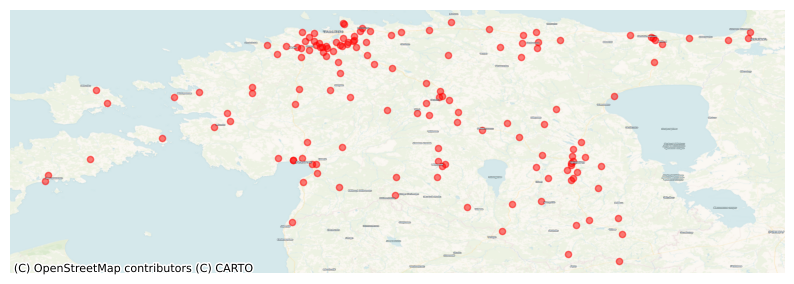

In [6]:
# Plot sensors
ax = gdf.plot(color = 'r', markersize = 20, alpha = .5, figsize = (10,10))
# Add context in backround
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')

In [93]:
# We have data for the entire Estonia, let's keep only Tallinn
cities = gpd.read_file('../../assets/world_urban_areas/World_Urban_Areas.geojson')
mask = cities[cities.Name == 'Tallinn'].geometry.values[0]
# Extend a bit the mask
gdf = gdf.clip(mask.buffer(.1))

In [95]:
column_translation = [
    "ID",                       # ID
    "Name",              # Nimetus (Name)
    "Type",                     # Liik (Type)
    "Status",                   # Staatus (Status)
    "County",                   # Maakond (County/Region)
    "Street_name",              # Tee nimi (Road Name)
    "Road Number",              # Tee nr (Road Number)
    "Road km",                  # Tee km (Road km)
    "Latitude",                 # Lat (Latitude)
    "Longitude",                # Lon (Longitude)
    "Lanes or Driving Tracks",  # Kanalid ehk sõidurajad (Lanes or Driving Tracks)
    "geometry"
]

gdf.columns = column_translation

(24.48883408, 25.07089072, 59.270754, 59.522786)

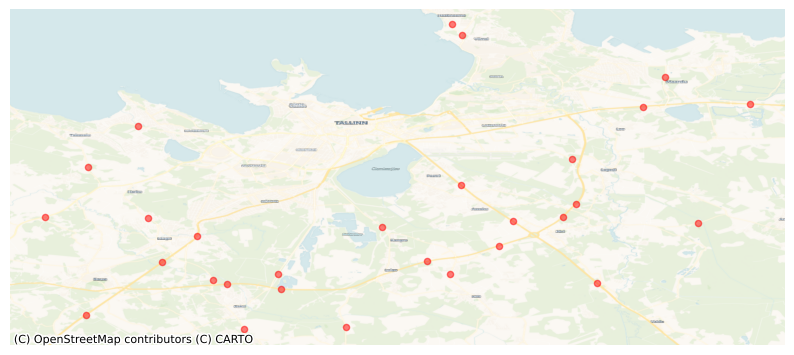

In [96]:
# Plot sensors
ax = gdf.plot(color = 'r', markersize = 20, alpha = .5, figsize = (10,10))
# Add context in backround
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')

In [97]:
gdf.columns

Index(['ID', 'Name', 'Type', 'Status', 'County', 'Street_name', 'Road Number',
       'Road km', 'Latitude', 'Longitude', 'Lanes or Driving Tracks',
       'geometry'],
      dtype='object')

In [98]:
gdf.dropna(subset = ['ID', 'geometry'], inplace=True)

In [99]:
gdf.ID.values

array(['74018', '077db', '5c298', '89f4a', 'f262f', '988f4', 'b5104',
       '1ed23', '8560b', '1d86e', '26d75', 'f6a58', 'ddf05', '0f55c',
       '31b9f', '1cf12', '36408', '0cfcf', '25785', 'd2421', '004a4'],
      dtype=object)

## Traffic counts

In [36]:
# One file corresponds to one year
# The files are heavy (~300Mo) Therefore it is not included in the GitHub
# Here we show an example for 2024
df = pd.read_csv('raw/003bbc41-6cd8-428c-acc0-7d11e62cf602-ll_2024.csv.csv')

c:\Users\xbonnema\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
df.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'id', 'kanal', 'aeg',
       '<40Kph', '40-<50', '50-<60', '60-<70', '70-<80', '80-<90', '90-<100',
       '100-<110', '110-<120', '120-<130', '=>130'],
      dtype='object')

In [43]:
column_translation = [
    "ID",       # id (Identifier)
    "Channel",  # kanal (Channel or Lane)
    "Time"      # aeg (Time)
]

In [46]:
# Filter only sensors nearby Tallinn
df = df[df.id.isin(gdf.ID.unique())]

In [61]:
# Undderstanding the means of the columns
(df[[str(k) for k in range(1, 11)]].sum(axis = 1) == df[['<40Kph', '40-<50', '50-<60', '60-<70', '70-<80', '80-<90', '90-<100',
       '100-<110', '110-<120', '120-<130', '=>130']].sum(axis = 1)).sum() == df.shape[0]

True

In [63]:
df['count'] = df[[str(k) for k in range(1, 11)]].sum(axis = 1)

C:\Users\xbonnema\AppData\Local\Temp\ipykernel_13916\3916926034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = df[[str(k) for k in range(1, 11)]].sum(axis = 1)


In [66]:
df.drop([
    '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 
       '<40Kph', '40-<50', '50-<60', '60-<70', '70-<80', '80-<90', '90-<100',
       '100-<110', '110-<120', '120-<130', '=>130',
], axis = 1, inplace=True)

c:\Users\xbonnema\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [77]:
df[(df.id == '004a4') & (df.aeg == '2024-01-01 00:00:00')]

,id,kanal,aeg,count
0,004a4,2,2024-01-01 00:00:00,80
8675,004a4,1,2024-01-01 00:00:00,59


In [79]:
# Aggregate hours and lanes ("kanal") together
df = df.groupby([pd.to_datetime(df.aeg).apply(lambda x : x.date()), 'id']).agg(
    # There is a need to manage missing data (for instance if we miss some of the hours)
    # Get mean hour valluue for this road segment ?
    count = ('count', 'sum'),
)
df

count
aeg        id          
2024-01-01 004a4   4317
           0cfcf  16202
           0f55c  12983
           1cf12   4722
           1d86e   5945
...                 ...
2024-12-31 b5104  15501
           d2421  17432
           ddf05  15136
           f262f  12304
           f6a58  15256

[7476 rows x 1 columns]

In [81]:
# Compute AADT on the entire year
df = df.groupby('id').agg(
    AADT = ('count', 'mean')
)

In [84]:
df.index.name = 'ID'

In [104]:
gdf = df.join(gdf.set_index('ID')[[
    'Street_name', 'geometry'
]]
        , on = 'ID', how = 'inner')

In [117]:
gdf = gpd.GeoDataFrame(gdf,
                       geometry = 'geometry', 
                       crs = 'epsg:4326')

## Map matching with OSM

In [105]:
import osmnx as ox
from tqdm import tqdm
from shapely.geometry import Point
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [106]:
# Avoid creating cache
ox.config(use_cache=False, log_console=False)

In [107]:
highway_importance = {
    "motorway": 1,
    "motorway_link": 2,
    "trunk": 3,
    "trunk_link": 4,
    "primary": 5,
    "primary_link": 6,
    "secondary": 7,
    "secondary_link": 8,
    "tertiary": 9,
    "tertiary_link": 10,
    "unclassified": 11,
    "residential": 12,
    "service": 13,
    "living_street": 14,
    "track": 15,
    "path": 16,
    "footway": 17,
    "cycleway": 18,
    "bridleway": 19,
    "other": 20,  # Default for unclassified roads
}

In [120]:
# Define search radius in meters
radius = 100

# Initialize a list to store results
closest_roads = []
highways = []
distances = []
osmids = []

# Iterate over each sensor point
for idx in tqdm(gdf.index):
    # retrieve sensor location
    point = gdf.loc[idx].geometry
    # OSMnx uses (latitude, longitude)
    point = (point.y, point.x)
    
    try :

        # Download the road network within the radius
        G = ox.graph_from_point(point, dist=radius, network_type="drive", 
                                simplify=False, # To avoid having list in the features values
                                retain_all=True, truncate_by_edge=True)

        # Convert the road network to a GeoDataFrame
        gdf_edges = ox.graph_to_gdfs(G, nodes = False)

        # Assign distance metric  
        # (warning : change the crs to 6933 to get results in meter, otherwise the distance values are likely incorrect)
        gdf_edges["distance"] = gdf_edges.to_crs(epsg=6933).geometry.distance(
            gpd.GeoSeries(Point(point[::-1]), crs = 'epsg:4326').to_crs(epsg=6933).values[0]
        )
     
        # Assign importance ranking
        gdf_edges["importance"] = gdf_edges["highway"].map(lambda x: highway_importance.get(x, highway_importance["other"]))

        # Find the closest edge based on importance and then distance
        closest_edge = gdf_edges.sort_values(by=["importance", "distance"]).iloc[0]
        
        # Append result with relevant information
        closest_roads.append(closest_edge["name"] if "name" in closest_edge else "Unnamed Road")
        highways.append(closest_edge["highway"] if "highway" in closest_edge else None)
        distances.append( closest_edge["distance"])
        osmids.append(closest_edge["osmid"])
        
    except ValueError as e:
        print(e)
       # Fill wit NaN values
        closest_roads.append(np.nan)
        highways.append(np.nan)
        distances.append(np.nan)
        osmids.append(np.nan)

# Update results in gdf
gdf['closest_roads'] = closest_roads
gdf['highway'] = highways
gdf['distance'] = distances
gdf['osmid'] = osmids

 10%|▉         | 2/21 [00:01<00:14,  1.33it/s]

Found no graph nodes within the requested polygon


 14%|█▍        | 3/21 [00:02<00:12,  1.45it/s]

Found no graph nodes within the requested polygon


 43%|████▎     | 9/21 [00:16<00:24,  2.04s/it]

Found no graph nodes within the requested polygon


 48%|████▊     | 10/21 [00:17<00:17,  1.60s/it]

Found no graph nodes within the requested polygon


100%|██████████| 21/21 [00:35<00:00,  1.68s/it]


In [121]:
print('Missing match', gdf.closest_roads.isna().sum())
print('...on a total of', gdf.shape[0], 'sensors')

Missing match 4
...on a total of 21 sensors


In [123]:
gdf[['Street_name', 'closest_roads']].values

array([['Viimsi-Rohuneeme tee', 'Rohuneeme tee'],
       ['Tallinna-Rapla-Türi tee', nan],
       ['Tallinna-Narva tee', nan],
       ['Tallinna-Tartu-Võru-Luhamaa tee',
        'Tallinn — Tartu — Võru — Luhamaa'],
       ['Tallinna-Paldiski tee', 'Tallinn — Paldiski'],
       ['Tallinna-Rapla-Türi tee', 'Viljandi mnt'],
       ['Tallinna ringtee', 'Tallinna ringtee'],
       ['Tallinna-Narva tee', 'Maardu — Raasiku'],
       ['Tallinna-Tartu-Võru-Luhamaa tee', nan],
       ['Tallinna-Pärnu-Ikla tee', nan],
       ['Tallinna-Rannamõisa-Kloogaranna tee', 'Rannamõisa tee'],
       ['Tallinna ringtee', 'Tallinna ringtee'],
       ['Tallinna-Pärnu-Ikla tee', 'Tallinn — Pärnu — Ikla'],
       ['Tallinna-Pärnu-Ikla tee', 'Pärnu mnt'],
       ['Tallinna ringtee', 'Tallinna ringtee'],
       ['Saku-Laagri tee', 'Saku — Laagri'],
       ['Tallinna ringtee', 'Tallinna ringtee'],
       ['Tallinna-Viimsi-Randvere tee', 'Randvere tee'],
       ['Tallinna ringtee', 'Tallinna ringtee'],
       ['Tal

# Final saving

In [125]:
gdf.to_file('treated/Tallinn_AADT_2024.geojson', index = False)